Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 7s 8ms/step - loss: 0.6923 - accuracy: 0.5471 - val_loss: 0.6873 - val_accuracy: 0.6592
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.6761 - accuracy: 0.6724 - val_loss: 0.6241 - val_accuracy: 0.7118
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.6134 - accuracy: 0.7121 

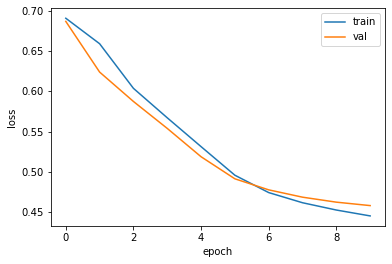

In [1]:
#1. LSTM응용

from tensorflow import keras
from tensorflow.keras.datasets import imdb
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense, LSTM, Input
import tensorflow as tf

gpu_devices = tf.config.experimental.list_physical_devices("GPU")
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)


(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)


from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model1.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=10, batch_size=32,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.4366 - accuracy: 0.8052 - val_loss: 0.4540 - val_accuracy: 0.7898
Epoch 2/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4388 - accuracy: 0.8023 - val_loss: 0.4553 - val_accuracy: 0.7886
Epoch 3/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4310 - accuracy: 0.8085 - val_loss: 0.4482 - val_accuracy: 0.7906
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4306 - accuracy: 0.8097 - val_loss: 0.4467 - val_accuracy: 0.7934
Epoch 5/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4245 - accuracy: 0.8080 - val_loss: 0.4416 - val_accuracy: 0.7948
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.4163 - accuracy: 0.8138 - val_loss: 0.4417 - val_accuracy: 0.7962
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4154 - accuracy: 0.8125 - val_loss: 0.4378 - val_accuracy: 0.7964
Epoch 

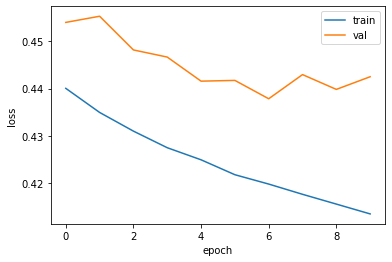

In [2]:
#2 순환층에 드롭아웃 적용
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.25))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstmdropout-model1.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=10, batch_size=32,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/50
313/313 [==============================] - 3s 9ms/step - loss: 0.3984 - accuracy: 0.8226 - val_loss: 0.4311 - val_accuracy: 0.7982
Epoch 2/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3976 - accuracy: 0.8216 - val_loss: 0.4276 - val_accuracy: 0.8084
Epoch 3/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3986 - accuracy: 0.8202 - val_loss: 0.4263 - val_accuracy: 0.8040
Epoch 4/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3970 - accuracy: 0.8199 - val_loss: 0.4291 - val_accuracy: 0.8056
Epoch 5/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3926 - accuracy: 0.8226 - val_loss: 0.4266 - val_accuracy: 0.8070
Epoch 6/50
313/313 [==============================] - 2s 8ms/step - loss: 0.3972 - accuracy: 0.8213 - val_loss: 0.4278 - val_accuracy: 0.8040


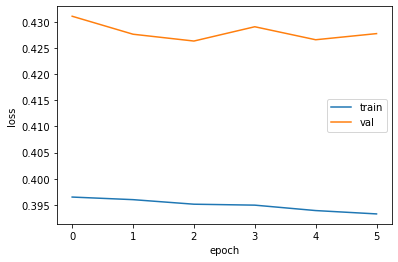

In [5]:
#다중 lstm순환층
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm2dropout-model1.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=50, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()


In [ ]:
#Gru
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))


rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model1.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=50, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()